<a href="https://colab.research.google.com/github/graviada/colabRepo/blob/master/%D0%9C%D0%B0%D1%82%D0%A1%D1%82%D0%B0%D1%82_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

In [ ]:
pip install seaborn

In [ ]:
# import scipy.stats as sc
import numpy as np
# import seaborn as sns
# import statistics as st
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from scipy import stats

In [ ]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append(row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

# **First file** ▶
1. Linear regression

In [ ]:
X_1, y_1 = load_data('1.txt')
n = len(X_1)

In [ ]:
x1_data = X_1.reshape(-1,1)
y1_data = y_1.reshape(-1,1)

In [ ]:
model = LinearRegression().fit(x1_data, y1_data)
predictions = model.predict(x1_data)

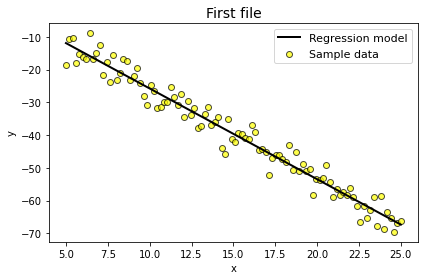

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(x1_data, y1_data, edgecolor='k', facecolor='yellow', alpha=0.7, label='Sample data')
ax.plot(x1_data, predictions, color='black', linewidth=2, label='Regression model')
ax.legend(facecolor='white', fontsize=11)
ax.set_title('First file', fontsize=14)

fig.tight_layout()
fig.savefig('1file_2D.png')

2. Checking the significance of coefficients



In [ ]:
def variance(data):
  n = len(data)
  deviations = [(x - np.mean(data)) ** 2 for x in data]
  return sum(deviations) / (n - 1)

In [ ]:
def st_dev(num):
  return num ** 0.5

In [ ]:
def s_(data_1, data_2, f):
  deviations = [(data_1[i] - data_2[i]) ** 2 for i in range(len(data_1))]
  return sum(deviations) / f

In [ ]:
def interval(e, coef):
  return (coef - e, coef + e)

In [ ]:
variance = variance(X_1)
st_dev = st_dev(variance)
s_ad = s_(y_1, predictions, n)

In [ ]:
m_a = s_ad / (st_dev * n ** 0.5)

squares = [x ** 2 for x in X_1]
m_b = sum(squares) ** 0.5 * s_ad / (n * st_dev ** 2)

In [ ]:
a = model.coef_
b = model.intercept_
print(a, b)

[[-2.77230625]] [1.95176319]


In [ ]:
# alpha = 0.05
e_a = 1.984 * m_a
e_b = 1.984 * m_b

interval_a = interval(e_a, a)
interval_b = interval(e_b, b)
print(interval_a, interval_b)

(array([[-3.10312796]]), array([[-2.44148455]])) (array([1.04334742]), array([2.86017895]))


In [ ]:
t_crit_a = a / m_a
t_crit_b = b / m_b
print(t_crit_a, t_crit_b)

[[-16.62604197]] [4.2626937]


3. Evaluate the adequacy of the model

In [ ]:
deviations = [(y_1[i] - np.mean(y_1)) ** 2 for i in range(len(y_1))]
s_general = sum(deviations) / (n - 1)

In [ ]:
f_dist = s_ad ** 2 / s_general ** 2
print(f_dist, 1.35)

[0.00127328] 1.35


# Second file ▶

In [ ]:
X_2, y_2 = load_data('2.txt')

In [ ]:
# df_x = pd.DataFrame(X_2, index=range(X_2.shape[0]),
#                           columns=["a", "b", "c"])

# df_y = pd.DataFrame(y_2, index=range(y_2.shape[0]))

In [ ]:
x2_data = X_2.reshape(-1,3)
y2_data = y_2

Needful functions

---

In [ ]:
def getPredictions(X, y, typ='pred'):
  model = LinearRegression().fit(X, y)
  if typ=='pred':
    return model.predict(X)
  elif typ=='coef':
    return model.coef_, model.intercept_

In [ ]:
def rss(data, predictions):
  rss = [(data[i] - predictions[i]) ** 2 for i in range(len(data))]
  return sum(rss)

In [ ]:
def dummy(X, y, par):
  dum_0 = []
  dum_1 = []
  y_dum_0 = []
  y_dum_1 = []
  for i in range(len(X)):
    if X[i][par] == 0.0:
      dum_0.append(X[i][0])
      y_dum_0.append(y[i])
    else:
      dum_1.append(X[i][0])
      y_dum_1.append(y[i])
  return dum_0, y_dum_0, dum_1, y_dum_1

In [ ]:
def fTest(RSS, RSS1, RSS2, n, k):
  return ((RSS - RSS1 - RSS2) * k) / ((RSS1 + RSS2) * (n - 2*k))



---

In [ ]:
predictions = getPredictions(x2_data, y2_data)
RSS = rss(y2_data, predictions)

1 dummy variable

In [ ]:
dum1_0, y2_dum1_0 = dummy(X_2, y_2, 1)[:2]

pred_d1_0 = getPredictions(np.array(dum1_0).reshape(-1, 1), np.array(y2_dum1_0))

RSS_1_0 = rss(y2_dum1_0, pred_d1_0)

In [ ]:
dum1_1, y2_dum1_1 = dummy(X_2, y_2, 1)[2:]

pred_d1_1 = getPredictions(np.array(dum1_1).reshape(-1, 1), np.array(y2_dum1_1))

RSS_1_1 = rss(y2_dum1_1, pred_d1_1)

2 dummy variable

In [ ]:
dum2_0, y2_dum2_0 = dummy(X_2, y_2, 2)[:2]

pred_d2_0 = getPredictions(np.array(dum2_0).reshape(-1, 1), np.array(y2_dum2_0))

RSS_2_0 = rss(y2_dum2_0, pred_d2_0)

In [ ]:
dum2_1, y2_dum2_1 = dummy(X_2, y_2, 2)[2:]

pred_d2_1 = getPredictions(np.array(dum2_1).reshape(-1, 1), np.array(y2_dum2_1))

RSS_2_1 = rss(y2_dum2_1, pred_d2_1)

In [ ]:
layout = go.Layout(
    title={
        'text': 'Second file',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='x',
    width=1200,
    height=650,
)

fig = go.Figure([
    go.Scatter(x=dum1_0, y=y2_dum1_0, name='Dummy-1: 0', mode='markers'),
    go.Scatter(x=dum1_1, y=y2_dum1_1, name='Dummy-1: 1', mode='markers'),
    go.Scatter(x=dum2_0, y=y2_dum2_0, name='Dummy-2: 0', mode='markers'),
    go.Scatter(x=dum2_1, y=y2_dum2_1, name='Dummy-2: 1', mode='markers'),

    go.Scatter(x=dum1_0, y=pred_d1_0, name='Pred-1: 0', mode='lines'),
    go.Scatter(x=dum1_1, y=pred_d1_1, name='Pred-1: 1', mode='lines'),
    go.Scatter(x=dum2_0, y=pred_d2_0, name='Pred-2: 0', mode='lines'),
    go.Scatter(x=dum2_1, y=pred_d2_1, name='Pred-2: 1', mode='lines')
], layout=layout)
fig.show()

RSS selection

In [ ]:
F_test1 = fTest(RSS, RSS_1_0, RSS_1_1, len(dum1_0), 2)
F_test2 = fTest(RSS, RSS_2_0, RSS_2_1, len(dum2_0), 2)

In [ ]:
print('RSS =', RSS)
print('1 dummy')
print('RSS1 =', RSS_1_0, 'RSS2 =', RSS_1_1)
print('2 dummy')
print('RSS1 =', RSS_2_0, 'RSS2 =', RSS_2_1)
print('F-test results')
print('F-test 1 =', F_test1, 'F-test2 =', F_test2)

RSS = 7334.767883372245
1 dummy
RSS1 = 0.03924056589293802 RSS2 = 463.9064745532764
2 dummy
RSS1 = 31180.94781833048 RSS2 = 33486.590228711575
F-test results
F-test 1 = 0.3085320627834764 F-test2 = -0.01927341919014714


# Third file ▶



In [ ]:
X_3, y_3 = load_data('3.txt')

In [ ]:
# fig = px.scatter(x=X_3[:,0], y=y_3, opacity=1)
# fig.add_traces(go.Scatter(x=X_3[:,0], y=predictions_3, name='Regression Fit'))
# fig.show()

Spearman test

In [ ]:
predictions_3 = getPredictions(X_3.reshape(-1, 1), y_3)

In [ ]:
SpearmanResult = stats.spearmanr(X_3, y_3)[0]
print(SpearmanResult)

0.19398739873987397


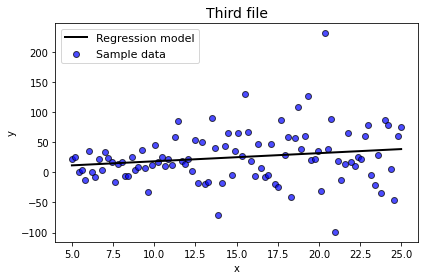

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(X_3, y_3, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample data')
ax.plot(X_3, predictions_3, color='black', linewidth=2, label='Regression model')
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Third file', fontsize=14)

fig.tight_layout()
fig.savefig('3file.png')

In [ ]:
n = len(X_3)
test_stat = (SpearmanResult * (n - 2) ** 0.5) / (1 - SpearmanResult ** 2) ** 0.5
print(test_stat)

1.9575630992033237


Goldfeld-Quandt test

In [ ]:
n_streak = int(3 / 8 * n)
average = int(n - 2 * n_streak)
print(n_streak, average)

37 26


In [ ]:
sample1_x = np.array(X_3[:n_streak])
sample1_y = np.array(y_3[:n_streak])

sample2_x = np.array(X_3[(n_streak + average) :])
sample2_y = np.array(y_3[(n_streak + average) :])

In [ ]:
# print(len(sample1_x), len(sample2_x))

In [ ]:
predictions_s1 = getPredictions(sample1_x.reshape(-1, 1), sample1_y)
predictions_s2 = getPredictions(sample2_x.reshape(-1, 1), sample2_y)

In [ ]:
F_stat = rss(sample1_x, predictions_s1) / rss(sample2_x, predictions_s2)
print(F_stat)

[0.16288437]


Checking the significance of the model coefficients

In [ ]:
a = getPredictions(X_3, y_3, 'coef')[0]
b = getPredictions(X_3, y_3, 'coef')[1]

In [ ]:
variance = variance(X_3)
st_dev = st_dev(variance)
s_ad = s_(y_3, predictions_3, n)

m_a = s_ad / (st_dev * n ** 0.5)

squares = [x ** 2 for x in X_3]
m_b = sum(squares) ** 0.5 * s_ad / (n * st_dev ** 2)

In [ ]:
e_a = 1.984 * m_a
e_b = 1.984 * m_b

interval_a = interval(e_a, a)
interval_b = interval(e_b, b)
print(interval_a, interval_b)

(array([-61.63882488]), array([64.34149828])) (array([-168.10323844]), array([177.83086698]))


In [ ]:
t_crit_a = a / m_a
t_crit_b = b / m_b
print(t_crit_a, t_crit_b)

[0.04256303] [0.05578986]


Evaluate the adequacy of the model

In [ ]:
deviations = [(y_3[i] - np.mean(y_3)) ** 2 for i in range(n)]
s_general = sum(deviations) / (n - 1)

f_dist = s_ad ** 2 / s_general ** 2
print(f_dist, 1.35)

0.9178170281349313 1.35
